© Explore Data Science Academy

# Spain Electricity Shortfall Challenge

### 1. Problem Statement:

The government of Spain is considering an expansion of its renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the country's renewable sources and fossil fuel energy generation. For this very reason, the government of Spain has been tracking the different energy sources available within the country.

In this project, you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`,etc.

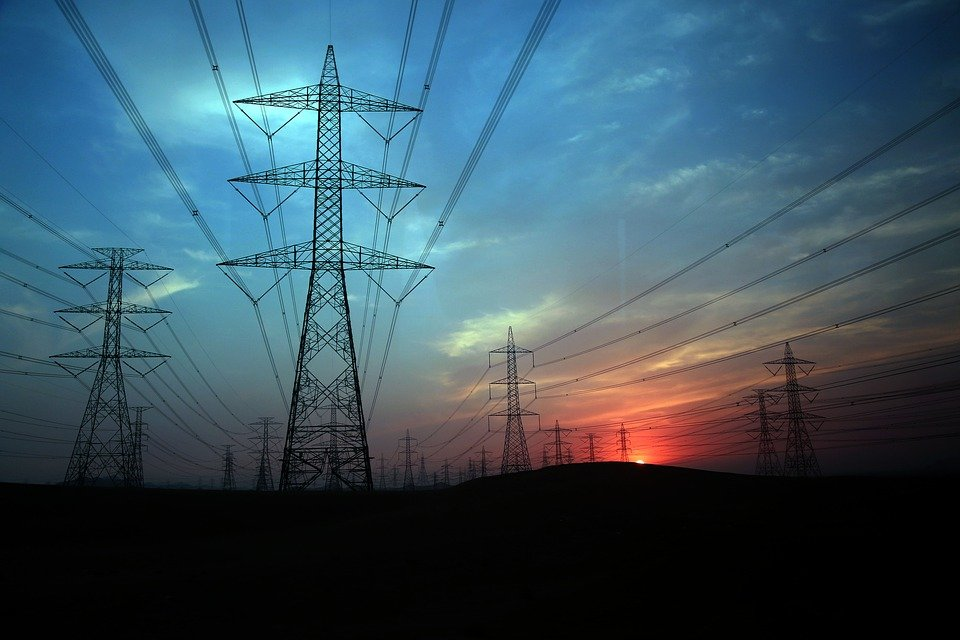



© Explore Data Science Academy

---
### Honour Code

I {**SELLO SYDNEY, MAFIKENG**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

- Imported libraries for Data loading, preprcessing , Visualization
- Libraries for Data Engineering , Feature Selection , Model building

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# # Libraries for data preparation and model building
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split , cross_validate

import xgboost as xgb
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score 


import warnings
warnings.filterwarnings('ignore')
# Setting global constants to ensure notebook results are reproducible


In [2]:
sns.set(style="darkgrid") # set seaborn style

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
#Load dataset
df_train = pd.read_csv("input/df_train.csv", index_col=0)
df_test = pd.read_csv("input/df_test.csv", index_col=0)

#Insurance dataset
copy_train = df_train.copy()
copy_test = df_test.copy()

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [4]:
df_train.head(3)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667


In [5]:
df_train.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

<AxesSubplot:xlabel='Valencia_wind_deg', ylabel='load_shortfall_3h'>

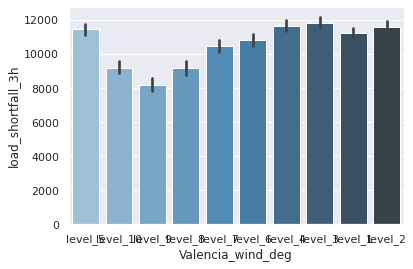

In [7]:
# plot relevant feature interactions
sns.barplot(x="Valencia_wind_deg", y="load_shortfall_3h", data=df_train,
                 palette="Blues_d")

In [ ]:
#Plotting correlation heat map for predictor variable in train 
train_features = df_train.drop(['load_shortfall_3h'], axis =1)
train_corr = train_features.corr()

# Mask top half of matrix as it contains redunant info
mask = np.zeros_like(train_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the matrix
plt.figure(figsize=(40,42))
sns.heatmap(train_corr,annot=True, vmin=-1, vmax=1, cmap='winter', linewidth=0.1, mask = mask)

In [ ]:
# plotting distributions of all the features in train
df_train.hist(bins=50, figsize=(20,20), color = 'tab:blue')
plt.show()

In [ ]:
ax = sns.distplot(df_train.load_shortfall_3h)

In [ ]:
sns.pairplot(df_train,hue='species',height=4)

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
df_train.isna().sum()

In [8]:

print(f'Train data shape: {df_train.shape}  |  Test data shape: {df_test.shape}')

Train data shape: (8763, 48)  |  Test data shape: (2920, 47)


In [9]:
# remove missing values/ features
missing_values_train = df_train.Valencia_pressure.isna().sum()
print(f'Train data Missing Values: {missing_values_train}  |   Percentage: {round(( missing_values_train/ df_train.Valencia_pressure.shape[0]) *100, 2)}%')

Train data Missing Values: 2068  |   Percentage: 23.6%


<AxesSubplot:>

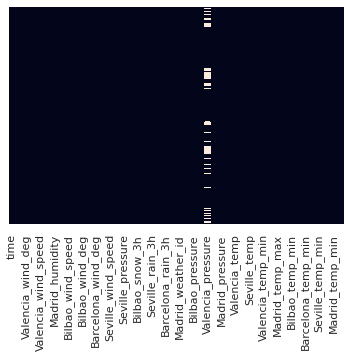

In [10]:
# Bar chart showing the number of missing values in each column
sns.heatmap(df_train.isna() , yticklabels=False , cbar=False)

In [11]:
missing_values_test = df_test.Valencia_pressure.isna().sum()
print(f'Train data Missing Values: {missing_values_test}  |   Percentage: {round(( missing_values_test / df_train.Valencia_pressure.shape[0]) *100, 2)}%')

Train data Missing Values: 454  |   Percentage: 5.18%


<AxesSubplot:>

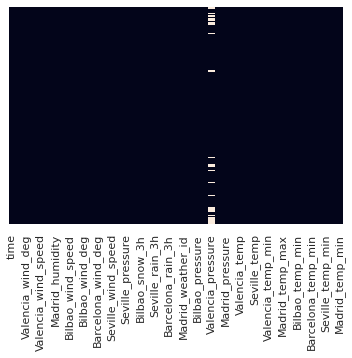

In [12]:
sns.heatmap(df_test.isna() , yticklabels=False , cbar=False)

In [13]:
mode = pd.concat([df_train.Valencia_pressure , df_test.Valencia_pressure]).mode()

In [14]:
#Impute missing values in Valencia_pressure with mean
df_train.Valencia_pressure.fillna(mode[0] , inplace=True)
df_test.Valencia_pressure.fillna(mode[0], inplace=True)

In [15]:
missing_values_train = df_train.Valencia_pressure.isna().sum()
print(f'Train data Missing Values: {missing_values_train}  |   Percentage: {round(( missing_values_train/ df_train.Valencia_pressure.shape[0]) *100, 2)}%')

Train data Missing Values: 0  |   Percentage: 0.0%


In [16]:
print(f'Sum of unique object: {df_train.Valencia_wind_deg.value_counts().count()}')
df_train.Valencia_wind_deg.unique()

Sum of unique object: 10


array(['level_5', 'level_10', 'level_9', 'level_8', 'level_7', 'level_6',
       'level_4', 'level_3', 'level_1', 'level_2'], dtype=object)

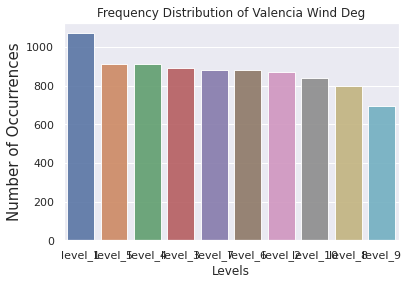

In [17]:
valencia_wind_count = df_train['Valencia_wind_deg'].value_counts()
sns.barplot(valencia_wind_count.index, valencia_wind_count.values, alpha=0.9)
plt.title('Frequency Distribution of Valencia Wind Deg')
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Levels', fontsize=12)
plt.show()

In [18]:
print(f'Sum of unique object: {df_train.Seville_pressure.value_counts().count()}')
df_train.Seville_pressure.unique()

Sum of unique object: 25


array(['sp25', 'sp23', 'sp24', 'sp21', 'sp16', 'sp9', 'sp15', 'sp19',
       'sp22', 'sp11', 'sp8', 'sp4', 'sp6', 'sp13', 'sp17', 'sp20',
       'sp18', 'sp14', 'sp12', 'sp5', 'sp10', 'sp7', 'sp3', 'sp2', 'sp1'],
      dtype=object)

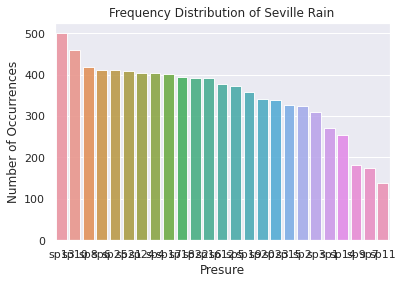

In [19]:
seville_presure_count = df_train['Seville_pressure'].value_counts()
sns.barplot(seville_presure_count.index, seville_presure_count.values, alpha=0.9)
plt.title('Frequency Distribution of Seville Rain')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Presure', fontsize=12)
plt.show()

In [20]:
#Impute Categirical features using OrdinalEncoder()
enc = OrdinalEncoder()

df_train.Valencia_wind_deg = enc.fit_transform(df_train[['Valencia_wind_deg']])
df_train.Seville_pressure = enc.fit_transform(df_train[['Seville_pressure']])

df_test.Valencia_wind_deg = enc.fit_transform(df_test[['Valencia_wind_deg']])
df_test.Seville_pressure = enc.fit_transform(df_test[['Seville_pressure']])

In [21]:
df_test.dtypes.value_counts()

float64    44
int64       2
object      1
dtype: int64

In [22]:
# create new features

# Transform Features
import datetime as dt

df_train['time'] = pd.to_datetime(df_train['time'])
df_test['time'] = pd.to_datetime(df_test['time'])
df_test_copy = df_test.copy()


# day
df_train['Day'] = df_train['time'].dt.day
df_test['Day'] = df_test['time'].dt.day

# month
df_train['Month'] = df_train['time'].dt.month
df_test['Month'] = df_test['time'].dt.month

# year
df_train['Year'] = df_train['time'].dt.year
df_test['Year'] = df_test['time'].dt.year

# hour
df_train['Start_hour'] = df_train['time'].dt.hour
df_test['Start_hour'] = df_test['time'].dt.hour

# Drop Feature
df_train.drop(['time'] , axis=1 , inplace=True)
df_test.drop(['time'] , axis=1 , inplace=True)

In [23]:
columns = df_train.drop(['load_shortfall_3h'] , axis=1).columns

In [24]:
df_test.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Start_hour
8763,5.000000,8.0,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,...,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,1,1,2018,0
8764,4.666667,8.0,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,...,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,1,1,2018,3
8765,2.333333,7.0,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,...,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,1,1,2018,6
8766,2.666667,7.0,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,...,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,1,1,2018,9
8767,4.000000,7.0,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,...,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,1,1,2018,12


In [25]:
# engineer existing features

#Scale the dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train.drop(['load_shortfall_3h'] , axis=1).values)
scaled_features_test = scaler.fit_transform(df_test.values)

In [26]:
df_train_scaled = pd.DataFrame(scaled_features, index=df_train.index, columns=columns)
df_test_scaled = pd.DataFrame(scaled_features_test, index=df_test.index , columns=columns)

In [27]:
#Add load_short_fall_3h as last_columns on training data
df_train_scaled['load_shortfall_3h'] = copy_train.load_shortfall_3h.values

In [28]:
# split data
X = df_train_scaled.drop(['load_shortfall_3h'], axis=1)
y = df_train_scaled.load_shortfall_3h
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [30]:
X_train.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Start_hour
4694,1.931761,0.600193,-0.362123,-0.381412,-0.309113,-0.784145,1.450037,-0.894581,0.478700,0.248660,...,0.765647,0.436874,0.547108,0.836250,0.301428,0.203982,-0.652427,0.427864,-0.000699,-0.218001
6020,-0.230091,-1.157189,-0.362123,0.033344,1.238194,1.078817,-0.721036,-0.304886,0.533636,-0.538533,...,-1.523782,-1.305108,-1.240788,-2.015634,-1.746092,-1.671303,0.825154,-1.602429,1.224780,-1.090901
1170,0.130218,-0.102760,0.438134,-0.104908,-1.355388,-1.071808,-1.335491,-0.501451,-0.565065,-1.103612,...,-0.075228,0.357340,-0.289370,1.103968,0.669632,0.812082,1.279795,-0.442262,-1.226179,1.527799
579,0.310372,-1.157189,2.838907,-0.243160,-0.191223,0.887042,1.491001,-0.304886,-0.565065,1.555203,...,-1.232466,-1.295976,-1.399881,-1.253044,-1.337860,-1.226060,-0.084126,-1.022345,-1.226179,-1.527351
2182,-0.950708,0.600193,-0.362123,-0.657917,0.737161,0.517189,0.251851,-0.698016,-0.565065,-1.165673,...,0.272366,-0.352453,0.495034,-0.344433,-0.380841,-0.339521,-1.675368,1.007947,-1.226179,-0.218001


## 5. Feature Selection


#### Recursive Feature Selection(RFE)

In [ ]:
r_selection = RFE(RandomForestRegressor(n_estimators=100 , random_state=0 , n_jobs=1), n_features_to_select=14)

In [ ]:
r_selection.fit(X_train , y_train)

In [ ]:
r_selection.get_support()

In [ ]:
#Best Selected features
features = X_train.columns[(r_selection.get_support())]
len(features)

In [ ]:
features

In [ ]:
#Estimators
r_selection.estimator_.feature_importances_

In [ ]:
X_train_r = r_selection.transform(X_train)
X_test_r = r_selection.transform(X_test)

In [35]:
best_features =  [ 'Madrid_wind_speed','Bilbao_rain_1h',
                                        'Bilbao_pressure',  'Year', 'Day',
                                        'Month', 'Start_hour']

<a id="five"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [36]:
# create one or more ML models
regression = [
    xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, random_state=0 ),
    # LinearRegression(),
    RandomForestRegressor(max_depth=100)
    ]

In [37]:
X = df_test_scaled[best_features]
X.columns

Index(['Madrid_wind_speed', 'Bilbao_rain_1h', 'Bilbao_pressure', 'Year', 'Day',
       'Month', 'Start_hour'],
      dtype='object')

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [38]:
# evaluate one or more ML models
from sklearn import metrics
print('-'*40 + 'Trained Succesfully' + '-'*40 + '\n')
for items in regression:
    model = items
    model.fit(X_train[best_features],y_train)
    train_model = model.predict(X_train[best_features])
    test_model = model.predict(X_test[best_features])
    
  
    #Dictionary of results showing RMSE & R2_Score
    results_dict = {'Training':
                        {
                            'Algo': model,
                            "RMSE": np.sqrt(metrics.mean_squared_error(y_train, train_model)),
                            'R2 Score': r2_score(y_train ,train_model)
                            
                        },
                    'Test':
                        {
                            'Algo': '--',
                            "RMSE": np.sqrt(metrics.mean_squared_error(y_test, test_model)),
                            'R2 Score': r2_score(y_test ,test_model)

                        }
                    
                   }
    scores = pd.DataFrame(data=results_dict)
    print(scores)
    print()
    print('-'*50+'End'+'-'*50)
    print()
#     y_pred =  model.predict(X)
#     daf = pd.DataFrame(y_pred, columns=['load_shortfall_3h'])
#     output = pd.DataFrame({"time": df_test_copy['time'].reset_index(drop=True)})
#     submissionF = output.join(daf)
#     submissionF['load_shortfall_3h'] = daf.values
#     submissionF.to_csv("submissionF.csv", index=False)
#     print(submissionF)



----------------------------------------Trained Succesfully----------------------------------------

                                                   Training      Test
Algo      XGBRegressor(base_score=0.5, booster='gbtree',...        --
RMSE                                                1540.99   2799.03
R2 Score                                           0.911675  0.719288

--------------------------------------------------End--------------------------------------------------

                                                   Training      Test
Algo      (DecisionTreeRegressor(max_depth=100, max_feat...        --
RMSE                                                 1083.4   2937.68
R2 Score                                           0.956342  0.690789

--------------------------------------------------End--------------------------------------------------



In [ ]:
# Compare model performance


### Choose best model and motivate why it is the best choice

- Random forests is great with high dimensional data since we are working with subsets of data. 
- faster to train than decision trees 
- also easy to view the relative importance it assigns to the input features

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

### discuss chosen methods logic

Random forests are a supervised Machine learning algorithm that is widely used in regression and classification problems and produces, even without hyperparameter tuning a great result most of the time. It is perhaps the most used algorithm because of its simplicity. It builds a number of decision trees on different samples 